**Import the dependencies**

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

**Data Collection**

In [2]:
data = pd.read_csv('UNFCCC_v24.csv', encoding= 'unicode_escape')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26408\3322783853.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('UNFCCC_v24.csv', encoding= 'unicode_escape')


**EDA**

In [3]:
data.head(7)

,Country_code,Country,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,Notation,PublicationDate,DataSource
0,NL,Netherlands,IPCC Common Reporting Format,SF6 - (CO2 equivalent),2.E.2,2.E.2 - TFT Flat Panel Display,2.E,Gg CO2 equivalent,2008,NaN,NO,20210616,EEA
1,NL,Netherlands,IPCC Common Reporting Format,SF6 - (CO2 equivalent),2.E.3,2.E.3 - Photovoltaics,2.E,Gg CO2 equivalent,1992,NaN,NO,20210616,EEA
2,NL,Netherlands,IPCC Common Reporting Format,SF6 - (CO2 equivalent),2.E.3,2.E.3 - Photovoltaics,2.E,Gg CO2 equivalent,2010,NaN,NO,20210616,EEA
3,NL,Netherlands,IPCC Common Reporting Format,SF6 - (CO2 equivalent),2.E.3,2.E.3 - Photovoltaics,2.E,Gg CO2 equivalent,2017,NaN,NO,20210616,EEA
4,NL,Netherlands,IPCC Common Reporting Format,SF6 - (CO2 equivalent),2.E.5,2.E.5 - Other electronics industry,2.E,Gg CO2 equivalent,1993,NaN,NO,20210616,EEA
5,NL,Netherlands,IPCC Common Reporting Format,SF6 - (CO2 equivalent),2.E.5,2.E.5 - Other electronics industry,2.E,Gg CO2 equivalent,2001,NaN,NO,20210616,EEA
6,LT,Lithuania,IPCC Common Reporting Format,N2O,1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg,2009,0.10775,NaN,20210616,EEA


In [4]:
#removing the unnamed Column
data.drop(columns='Notation' , axis = 1, inplace=True)
data.head(7)

,Country_code,Country,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,PublicationDate,DataSource
0,NL,Netherlands,IPCC Common Reporting Format,SF6 - (CO2 equivalent),2.E.2,2.E.2 - TFT Flat Panel Display,2.E,Gg CO2 equivalent,2008,NaN,20210616,EEA
1,NL,Netherlands,IPCC Common Reporting Format,SF6 - (CO2 equivalent),2.E.3,2.E.3 - Photovoltaics,2.E,Gg CO2 equivalent,1992,NaN,20210616,EEA
2,NL,Netherlands,IPCC Common Reporting Format,SF6 - (CO2 equivalent),2.E.3,2.E.3 - Photovoltaics,2.E,Gg CO2 equivalent,2010,NaN,20210616,EEA
3,NL,Netherlands,IPCC Common Reporting Format,SF6 - (CO2 equivalent),2.E.3,2.E.3 - Photovoltaics,2.E,Gg CO2 equivalent,2017,NaN,20210616,EEA
4,NL,Netherlands,IPCC Common Reporting Format,SF6 - (CO2 equivalent),2.E.5,2.E.5 - Other electronics industry,2.E,Gg CO2 equivalent,1993,NaN,20210616,EEA
5,NL,Netherlands,IPCC Common Reporting Format,SF6 - (CO2 equivalent),2.E.5,2.E.5 - Other electronics industry,2.E,Gg CO2 equivalent,2001,NaN,20210616,EEA
6,LT,Lithuania,IPCC Common Reporting Format,N2O,1.A.3.b,1.A.3.b - Road Transportation,1.A.3,Gg,2009,0.10775,20210616,EEA


In [5]:
data.shape

(686348, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686348 entries, 0 to 686347
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country_code        686348 non-null  object 
 1   Country             686348 non-null  object 
 2   Format_name         686348 non-null  object 
 3   Pollutant_name      686348 non-null  object 
 4   Sector_code         686348 non-null  object 
 5   Sector_name         686348 non-null  object 
 6   Parent_sector_code  628766 non-null  object 
 7   Unit                686348 non-null  object 
 8   Year                686348 non-null  object 
 9   emissions           426498 non-null  float64
 10  PublicationDate     686348 non-null  int64  
 11  DataSource          686348 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 62.8+ MB


In [7]:
# checking for missing values
data.isnull().sum()

Country_code               0
Country                    0
Format_name                0
Pollutant_name             0
Sector_code                0
Sector_name                0
Parent_sector_code     57582
Unit                       0
Year                       0
emissions             259850
PublicationDate            0
DataSource                 0
dtype: int64

On a 37,85% de données manquantes pour les quatitées d'émission
et 8,38% de données manquantes pour les Parent_sector_code

In [8]:
data.describe()

,emissions,PublicationDate
count,4.264980e+05,686348.0
mean,2.549875e+04,20210616.0
std,2.517595e+05,0.0
min,-4.673036e+05,20210616.0
25%,4.483300e-01,20210616.0
50%,4.070052e+01,20210616.0
75%,1.109751e+03,20210616.0
max,5.849394e+06,20210616.0


In [9]:
data['emissions'].value_counts()

 0.00000        955
 0.00001        717
 0.00002        601
 0.00005        410
 24.96794       404
               ... 
-20474.65619      1
-21510.69465      1
 12773.20649      1
 1203.99933       1
 0.23575          1
Name: emissions, Length: 281411, dtype: int64

In [10]:
data['Country'].value_counts()

Hungary                        24408
Slovenia                       21896
Romania                        21801
Spain                          20610
Ireland                        20610
Lithuania                      20606
Poland                         20564
Denmark                        20460
Slovakia                       20430
Finland                        20222
Estonia                        20052
United Kingdom (Convention)    20010
Bulgaria                       19831
EU (KP)                        19590
EU-27                          19590
EU-27+UK                       19590
Netherlands                    19470
Germany                        19440
France                         19401
Czechia                        19369
Portugal                       19290
Belgium                        19110
Malta                          19095
Cyprus                         19077
Italy                          18990
Latvia                         18990
Croatia                        18900
G

In [11]:
data['Format_name'].value_counts()

IPCC Common Reporting Format    686348
Name: Format_name, dtype: int64

In [12]:
data['Pollutant_name'].value_counts()

All greenhouse gases - (CO2 equivalent)                180335
CH4                                                    136493
CO2                                                    128506
N2O                                                    126180
HFCs - (CO2 equivalent)                                 25821
PFCs - (CO2 equivalent)                                 24390
SF6 - (CO2 equivalent)                                  22987
Unspecified mix of HFCs and PFCs - (CO2 equivalent)     21536
NF3 - (CO2 equivalent)                                  20100
Name: Pollutant_name, dtype: int64

In [13]:
data['Unit'].value_counts()

Gg                   391179
Gg CO2 equivalent    295169
Name: Unit, dtype: int64

In [15]:
data['DataSource'].value_counts()

EEA    686348
Name: DataSource, dtype: int64

In [14]:
data['PublicationDate'].value_counts()

20210616    686348
Name: PublicationDate, dtype: int64

In [17]:
data['Parent_sector_code'].value_counts()

2                           50594
2.B                         37785
Sectors/Totals_incl_incl    37452
4                           34218
1.A.2                       29820
2.C                         26406
3                           25161
1.AA                        21300
1.A.3                       21300
2.E                         20976
1.A.3.b                     20816
2.F                         19574
5                           18105
3.F                         15705
3.B                         14910
4.D                         12828
4.A                         12828
4.C                         12798
4.B                         12798
2.D                         12780
1.A.4                       12780
1.A.1                       12780
4.E                         12620
1.D                         10650
1                           10650
4.F                         10450
5.A                          9585
5.D                          9582
2.A                          8520
5.C           

**Encoding categorical data**

In [18]:
# encoding "Format_name" Column
data.replace({'Format_name':{'IPCC Common Reporting Format':0}},inplace=True)

In [19]:
# encoding "Pollutant_name" Column
data.replace({'Pollutant_name':{'All greenhouse gases - (CO2 equivalent)':0, 'CH4':1, 'CO2':2, 'N2O':3, 'HFCs - (CO2 equivalent)':4, 'PFCs - (CO2 equivalent)':5, 'SF6 - (CO2 equivalent)':6, 'Unspecified mix of HFCs and PFCs - (CO2 equivalent)':7, 'NF3 - (CO2 equivalent)':8}},inplace=True)

In [20]:
# encoding "Unit" Column
data.replace({'Unit':{'Gg':0, 'Gg CO2 equivalent':1}},inplace=True)

In [21]:
# encoding "DataSource" Column
data.replace({'DataSource':{'EEA':0}},inplace=True)

In [22]:
# encoding "PublicationDate" Column
data.replace({'PublicationDate':{20210616:0}},inplace=True)

In [23]:
data.head(8)

,Country_code,Country,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,PublicationDate,DataSource
0,NL,Netherlands,0,6,2.E.2,2.E.2 - TFT Flat Panel Display,2.E,1,2008,NaN,0,0
1,NL,Netherlands,0,6,2.E.3,2.E.3 - Photovoltaics,2.E,1,1992,NaN,0,0
2,NL,Netherlands,0,6,2.E.3,2.E.3 - Photovoltaics,2.E,1,2010,NaN,0,0
3,NL,Netherlands,0,6,2.E.3,2.E.3 - Photovoltaics,2.E,1,2017,NaN,0,0
4,NL,Netherlands,0,6,2.E.5,2.E.5 - Other electronics industry,2.E,1,1993,NaN,0,0
5,NL,Netherlands,0,6,2.E.5,2.E.5 - Other electronics industry,2.E,1,2001,NaN,0,0
6,LT,Lithuania,0,3,1.A.3.b,1.A.3.b - Road Transportation,1.A.3,0,2009,0.10775,0,0
7,LT,Lithuania,0,3,1.A.3.b.i,1.A.3.b.i - Cars,1.A.3.b,0,2009,0.08124,0,0


**Replacing the missing values**

In [24]:
#replacing the missing values of the column "emissions" with the mean value
moyenne = data['emissions'].mean()
data['emissions'].fillna(moyenne,inplace=True)

In [25]:
data.head()

,Country_code,Country,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,PublicationDate,DataSource
0,NL,Netherlands,0,6,2.E.2,2.E.2 - TFT Flat Panel Display,2.E,1,2008,25498.74795,0,0
1,NL,Netherlands,0,6,2.E.3,2.E.3 - Photovoltaics,2.E,1,1992,25498.74795,0,0
2,NL,Netherlands,0,6,2.E.3,2.E.3 - Photovoltaics,2.E,1,2010,25498.74795,0,0
3,NL,Netherlands,0,6,2.E.3,2.E.3 - Photovoltaics,2.E,1,2017,25498.74795,0,0
4,NL,Netherlands,0,6,2.E.5,2.E.5 - Other electronics industry,2.E,1,1993,25498.74795,0,0


In [26]:
#replacing the missing values of the column "Parent_sector_code" with the most frequent value
data = data.fillna(data['Parent_sector_code'].value_counts().index[0])

In [27]:
data.isnull().sum()

Country_code          0
Country               0
Format_name           0
Pollutant_name        0
Sector_code           0
Sector_name           0
Parent_sector_code    0
Unit                  0
Year                  0
emissions             0
PublicationDate       0
DataSource            0
dtype: int64

=> Il n'y a pas encore de valeurs manquantes 

**Separating the data and labels**

In [28]:
X =data.drop(['emissions'],axis=1) 
Y =data['emissions']

In [29]:
print(X)

       Country_code      Country  Format_name  Pollutant_name Sector_code  \
0                NL  Netherlands            0               6       2.E.2   
1                NL  Netherlands            0               6       2.E.3   
2                NL  Netherlands            0               6       2.E.3   
3                NL  Netherlands            0               6       2.E.3   
4                NL  Netherlands            0               6       2.E.5   
...             ...          ...          ...             ...         ...   
686343           NL  Netherlands            0               6         2.E   
686344           NL  Netherlands            0               6       2.E.1   
686345           NL  Netherlands            0               6       2.E.1   
686346           NL  Netherlands            0               6       2.E.2   
686347           NL  Netherlands            0               6       2.E.2   

                                        Sector_name Parent_sector_code  Uni

In [30]:
print(Y)

0         25498.74795
1         25498.74795
2         25498.74795
3         25498.74795
4         25498.74795
             ...     
686343    25498.74795
686344    25498.74795
686345    25498.74795
686346    25498.74795
686347    25498.74795
Name: emissions, Length: 686348, dtype: float64


In [31]:
X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')

In [32]:
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

**Splitting Training and Test Data**

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2) #80% will be trained data and 20% will be testing data 

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(686348, 11) (480443, 11) (205905, 11)


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Country_code']=le.fit_transform(data['Country_code'])
data['Country']=le.fit_transform(data['Country'])
data['Sector_code']=le.fit_transform(data['Sector_code'])
data['Sector_name']=le.fit_transform(data['Sector_name'])
data['Parent_sector_code']=le.fit_transform(data['Parent_sector_code'])

In [50]:
data.head(8)

,Country_code,Country,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,PublicationDate,DataSource
0,25,23,0,6,73,73,16,1,2008,25498.74795,0,0
1,25,23,0,6,74,74,16,1,1992,25498.74795,0,0
2,25,23,0,6,74,74,16,1,2010,25498.74795,0,0
3,25,23,0,6,74,74,16,1,2017,25498.74795,0,0
4,25,23,0,6,76,76,16,1,1993,25498.74795,0,0
5,25,23,0,6,76,76,16,1,2001,25498.74795,0,0
6,21,20,0,3,16,16,3,0,2009,0.10775,0,0
7,21,20,0,3,17,17,4,0,2009,0.08124,0,0


**Model Training**

1. Linear Regression

In [37]:
#loading lineair regression model
lin_reg_model = LinearRegression()

In [38]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [39]:
#Prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [40]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction) #should be as low as possible
print('R squared Error:' , error_score)

R squared Error: 0.00244807121805779


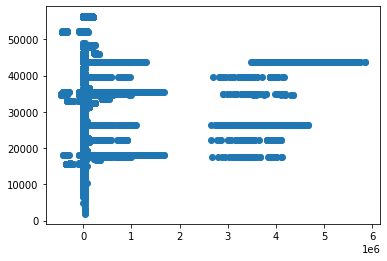

In [41]:
plt.scatter(Y_train, training_data_prediction)
plt.show()

In [42]:
#Prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)

In [43]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction) 
print('R squared Error:' , error_score)

R squared Error: 0.0023725662252106483


2.DecisionTreeRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [46]:
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [47]:
predictions = model.predict(X_test)

In [48]:
from sklearn.metrics import mean_absolute_error
model.score(X_test, predictions)

1.0

In [49]:
features = np.array([[21, 20,0, 4,16,16,3,0,2009,0,0]])
print(model.predict(features))

[8.27460192]


C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [51]:
features = np.array([[21, 20,0, 4,17,17,4,0,2009,0,0]])
print(model.predict(features))

[7053.54532633]


C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


=>Fausses prédictions